# `hmmlearn`

Does not seem to work with `scikit-learn` 0.2.

    conda install -c omnia hmmlearn=0.3.0b=np112py36_0
    conda install -c omnia scikit-learn=0.19.1=py36hedc7406_0


# FFT

https://www.oreilly.com/library/view/elegant-scipy/9781491922927/ch04.html

In [105]:
import random
import numpy as np
import pandas as pd

In [51]:
no_accel_samples = 100
window_accel_samples = 10
acceleration_model_function = np.random.random

In [1]:
import numpy as np
from hmmlearn import hmm

In [737]:
# Probabilities too high for 900 samples

np.random.seed(42)

n_components = 6

model = hmm.GaussianHMM(n_components=n_components
                        , covariance_type="full")

# Start probabilities
p_start_rum_wel = 1.0 # 0.6-0.01
p_start_eat_wel = 0.0 # 0.3-0.01
p_start_oth_wel = 0.0 # 0.1-0.01
p_start_rum_ill = 0.0 # 0.01
p_start_eat_ill = 0.0 # 0.01
p_start_oth_ill = 0.0 # 0.01

# Probability delta-in-transition from well to ill
p_d_wel_to_ill = 0.0 # 0.01
p_d_ill_to_well = 0.1

# Probability of transition from rumination
p_trans_rum_to_rum = 1.0 # 0.7
p_trans_rum_to_eat = 0.0 # 0.2
p_trans_rum_to_oth = 0.0 # 0.1

# Probability of transition from eating
p_trans_eat_to_rum = 0.3
p_trans_eat_to_eat = 0.5
p_trans_eat_to_oth = 0.2

# Probability of transition from other
p_trans_oth_to_rum = 0.3
p_trans_oth_to_eat = 0.3
p_trans_oth_to_oth = 0.4

# Prob of transition from rumination
p_trans_rum_wel_to_rum_wel = p_trans_rum_to_rum-p_d_wel_to_ill
p_trans_rum_wel_to_eat_wel = p_trans_rum_to_eat-p_d_wel_to_ill
p_trans_rum_wel_to_oth_wel = p_trans_rum_to_oth-p_d_wel_to_ill
p_trans_rum_wel_to_rum_ill = p_d_wel_to_ill
p_trans_rum_wel_to_eat_ill = p_d_wel_to_ill
p_trans_rum_wel_to_oth_ill = p_d_wel_to_ill

# Prob of transition from eating
p_trans_eat_wel_to_rum_wel = p_trans_eat_to_rum-p_d_wel_to_ill
p_trans_eat_wel_to_eat_wel = p_trans_eat_to_eat-p_d_wel_to_ill
p_trans_eat_wel_to_oth_wel = p_trans_eat_to_oth-p_d_wel_to_ill
p_trans_eat_wel_to_rum_ill = p_d_wel_to_ill
p_trans_eat_wel_to_eat_ill = p_d_wel_to_ill
p_trans_eat_wel_to_oth_ill = p_d_wel_to_ill

# Prob of transition from other
p_trans_oth_wel_to_rum_wel = p_trans_oth_to_rum-p_d_wel_to_ill
p_trans_oth_wel_to_eat_wel = p_trans_oth_to_eat-p_d_wel_to_ill
p_trans_oth_wel_to_oth_wel = p_trans_oth_to_oth-p_d_wel_to_ill
p_trans_oth_wel_to_rum_ill = p_d_wel_to_ill
p_trans_oth_wel_to_eat_ill = p_d_wel_to_ill
p_trans_oth_wel_to_oth_ill = p_d_wel_to_ill

# SICK
# Prob of transition from rumination sick
p_trans_rum_ill_to_rum_wel = p_d_ill_to_well
p_trans_rum_ill_to_eat_wel = p_d_ill_to_well
p_trans_rum_ill_to_oth_wel = p_d_ill_to_well
p_trans_rum_ill_to_rum_ill = p_trans_rum_to_rum - p_d_ill_to_well
p_trans_rum_ill_to_eat_ill = p_trans_rum_to_eat - p_d_ill_to_well
p_trans_rum_ill_to_oth_ill = p_trans_rum_to_oth - p_d_ill_to_well

# Prob of transition from eating sick
p_trans_eat_ill_to_rum_wel = p_d_ill_to_well
p_trans_eat_ill_to_eat_wel = p_d_ill_to_well
p_trans_eat_ill_to_oth_wel = p_d_ill_to_well
p_trans_eat_ill_to_rum_ill = p_trans_eat_to_rum - p_d_ill_to_well
p_trans_eat_ill_to_eat_ill = p_trans_eat_to_eat - p_d_ill_to_well
p_trans_eat_ill_to_oth_ill = p_trans_eat_to_oth - p_d_ill_to_well

# Prob of transition from other sick
p_trans_oth_ill_to_rum_wel = p_d_ill_to_well
p_trans_oth_ill_to_eat_wel = p_d_ill_to_well
p_trans_oth_ill_to_oth_wel = p_d_ill_to_well
p_trans_oth_ill_to_rum_ill = p_trans_oth_to_rum - p_d_ill_to_well
p_trans_oth_ill_to_eat_ill = p_trans_oth_to_eat - p_d_ill_to_well
p_trans_oth_ill_to_oth_ill = p_trans_oth_to_oth - p_d_ill_to_well

# Setting start probabilities 
model.startprob_ = np.array([p_start_rum_wel
                             , p_start_eat_wel
                             , p_start_oth_wel
                             , p_start_rum_ill
                             , p_start_eat_ill
                             , p_start_oth_ill])

model.transmat_ = np.array([[p_trans_rum_wel_to_rum_wel # 0 to
                             , p_trans_rum_wel_to_eat_wel # 0 to
                             , p_trans_rum_wel_to_oth_wel # 0 to
                             , p_trans_rum_wel_to_rum_ill # 0 to
                             , p_trans_rum_wel_to_eat_ill # 0 to
                             , p_trans_rum_wel_to_oth_ill], # 0 to
                            [p_trans_eat_wel_to_rum_wel # 1
                             , p_trans_eat_wel_to_eat_wel # 1
                             , p_trans_eat_wel_to_oth_wel # 1
                             , p_trans_eat_wel_to_rum_ill # 1
                             , p_trans_eat_wel_to_eat_ill # 1
                             , p_trans_eat_wel_to_oth_ill], # 1
                            [p_trans_oth_wel_to_rum_wel # 2
                             , p_trans_oth_wel_to_eat_wel # 2
                             , p_trans_oth_wel_to_oth_wel # 2
                             , p_trans_oth_wel_to_rum_ill # 2
                             , p_trans_oth_wel_to_eat_ill # 2
                             , p_trans_oth_wel_to_oth_ill], # 2
                            # Ill ruminating to 
                            [p_trans_rum_ill_to_rum_wel # 3
                             , p_trans_rum_ill_to_eat_wel # 3
                             , p_trans_rum_ill_to_oth_wel # 3
                             , p_trans_rum_ill_to_rum_ill # 3
                             , p_trans_rum_ill_to_eat_ill # 3
                             , p_trans_rum_ill_to_oth_ill], # 3
                            # Ill eating to
                            [p_trans_eat_ill_to_rum_wel # 4
                             , p_trans_eat_ill_to_eat_wel # 4
                             , p_trans_eat_ill_to_oth_wel # 4
                             , p_trans_eat_ill_to_rum_ill # 4
                             , p_trans_eat_ill_to_eat_ill # 4
                             , p_trans_eat_ill_to_oth_ill], # 4
                            # 5 Ill other to 
                            [p_trans_oth_ill_to_rum_wel # 5 
                             , p_trans_oth_ill_to_eat_wel # 5
                             , p_trans_oth_ill_to_oth_wel # 5
                             , p_trans_oth_ill_to_rum_ill # 5
                             , p_trans_oth_ill_to_eat_ill # 5
                             , p_trans_oth_ill_to_oth_ill] # 5
                           ])

# cols
# 1. frequency peak location
# 2. frequency peak magnitude
# 3. variance mgnitude

model.means_ = np.array([
      
      [0.5,  1.0, 0.0]    # 0 - rum 
    , [2.5,  0.1, 4.0]    # 1 - eat
    , [2.5,  0.1, 1.0]    # 2
    , [2.5,  1.0, 2.0]    # 3
    , [2.5,  0.1, 4.0]    # 4
    , [2.5,  0.1, 1.0]    # 5

])

#model.covars_ = np.tile(np.identity(3), (n_components, 1, 1))

model.covars_ = np.array([
       [[0.0001, 0., 0.],
        [0., 2.0, 0.],
        [0., 0., 0.0000001]],

       [[0.001, 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]],

       [[0.01, 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]],

       [[0.0001, 0., 0.],
        [0., 0.1, 0.],
        [0., 0., 1.0]],

       [[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]],

       [[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]]])

X, Z = model.sample(900)

features = pd.DataFrame(X, columns=['f_peak', 'f_magnitude', 'variance'])

In [738]:
X

array([[ 5.03189022e-01, -5.72435943e-01,  8.82406045e-05],
       [ 4.95305256e-01,  2.42908442e+00,  1.71572551e-04],
       [ 4.90759172e-01,  1.91946420e-01, -8.26160538e-04],
       ...,
       [ 4.87073747e-01,  1.66225810e-01, -1.68286476e-04],
       [ 5.12083478e-01,  1.46080855e+00,  3.60962711e-04],
       [ 5.04441983e-01,  2.08988016e-01,  3.48268899e-04]])

### FFT

In [739]:
import numpy as np
from scipy import pi
import matplotlib.pyplot as plt
%matplotlib inline

# Sampling rate and time vector
start_time = 0 # seconds
end_time = 90 # seconds
sampling_rate = 10 # Hz
N = (end_time - start_time)*sampling_rate # array size

# Frequency domain peaks
peak1_hz = 2.5 # Hz where the peak occurs
peak1_mag = 1 # magnitude of the peak
peak2_hz = 2.6 # Hz where the peak occurs
peak2_mag = 0.5 # magnitude of the peak

# Noise control
noise_loc = 0 # the Gaussian noise is mean-centered
noise_mag = 2.0 # magnitude of added noise

# Vibration data generation
time = np.linspace(start_time, end_time, N)
#vib_data = (peak1_mag*np.sin(2*pi*peak1_hz*time) 
#            + np.random.normal(0, noise_mag, N) 
#           # + peak2_mag*np.sin(2*pi*peak2_hz*time) 
#           )

#vib_data = np.zeros(N)

#for v, x in zip(vib_data, X):
#    print(v, x)
    

# Data plotting
#plt.plot(time, vib_data)
#plt.xlabel('Time')
#plt.ylabel('Vibration (g)')
#plt.title('Time Domain (Healthy Machinery)');

In [740]:
features['time'] = time

In [741]:
features.head()

,f_peak,f_magnitude,variance,time
0,0.503189,-0.572436,0.000088,0.000000
1,0.495305,2.429084,0.000172,0.100111
2,0.490759,0.191946,-0.000826,0.200222
3,0.489872,2.344026,0.000099,0.300334
4,0.478604,0.005322,-0.000199,0.400445


In [742]:
features['signal'] = (2.0#features['f_magnitude']
     
                      *np.sin(2*pi*features['f_peak']*features['time'])
    #* np.sin(2*pi*2.5*features['time'])
                      #+ np.random.normal(0, features['variance']**2)
                      #+ features['variance']
                     )

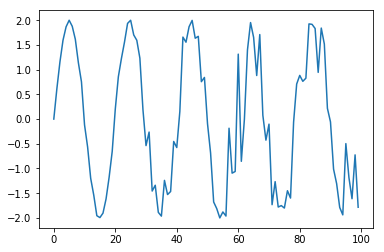

In [743]:
features['signal'][0:100].plot()

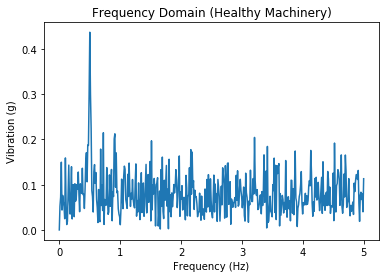

In [744]:
from scipy.fftpack import fft

# Nyquist Sampling Criteria
T = 1/sampling_rate # inverse of the sampling rate
x = np.linspace(0.0, 1.0/(2.0*T), int(N/2))

# FFT algorithm
vib_data = features['signal']
yr = fft(vib_data - vib_data.sum()/len(vib_data)) # "raw" FFT with both + and - frequencies
y = 2/N * np.abs(yr[0:np.int(N/2)]) # positive freqs only

# Plotting the results
plt.plot(x, y)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Vibration (g)')
plt.title('Frequency Domain (Healthy Machinery)');

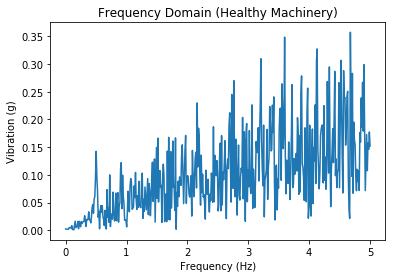

In [745]:
from scipy.fftpack import fft

# Nyquist Sampling Criteria
T = 1/sampling_rate # inverse of the sampling rate
x = np.linspace(0.0, 1.0/(2.0*T), int(N/2))

# FFT algorithm
vib_data = features['signal']
yr = fft(vib_data.diff()[1:]) # "raw" FFT with both + and - frequencies
y = 2/N * np.abs(yr[0:np.int(N/2)]) # positive freqs only

# Plotting the results
plt.plot(x, y)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Vibration (g)')
plt.title('Frequency Domain (Healthy Machinery)');

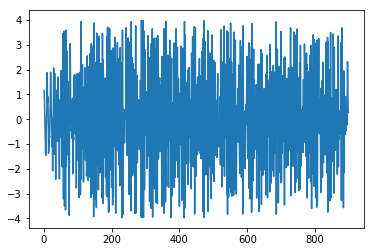

In [727]:
vib_data.diff()[1:].plot()

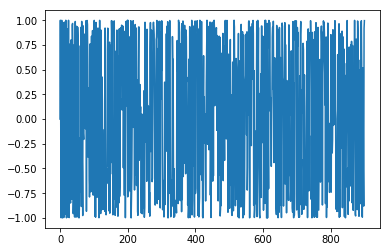

In [662]:
vib_data.plot()

In [663]:
vib_data.sum()

9.01762174017787

In [595]:
vib_data.diff().sum()

0.48500671198213663

In [503]:
from scipy.fftpack import ifft
iii = np.real(ifft(yr))

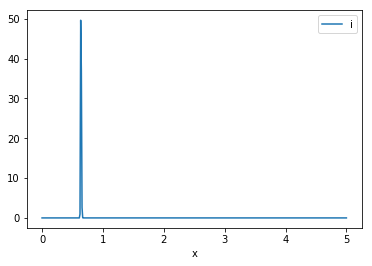

In [320]:
import scipy.stats
#fff = scipy.stats.norm(2.5, 0.001).pdf(x)
#fff = scipy.stats.poisson(2.5)#.pmf(k=x)#.pdf(x)
#fff = scipy.stats.poisson(2.5).cdf(x)#.pmf(k=x)#.pdf(x)
fff = scipy.stats.gamma(40.0, 0.6, 0.001).pdf(x)

#fff = np.zeros(len(x))

#fff[200] = 1.0

df = pd.DataFrame({'i':fff, 'x':x})#.plot(x='x', y='i')

df.plot(x='x', y='i')

In [321]:
def ffff(row):
    #print(row)
    return row.i * np.sin(2*pi*row.x*time) 


df_sin = df.apply(ffff, axis=1, result_type='expand')

In [322]:
df_sin_sum = df_sin.sum()

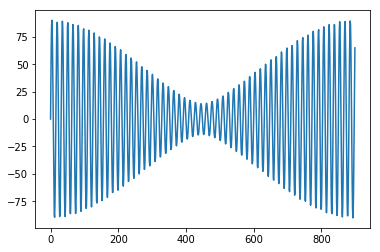

In [323]:
df_sin_sum.plot()

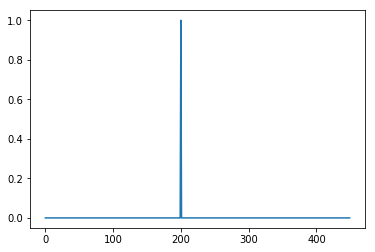

In [168]:
df.i.plot()

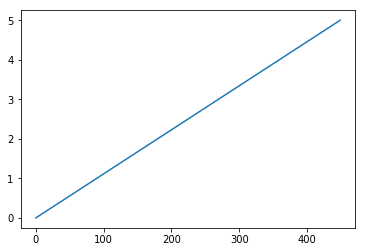

In [169]:
df.x.plot()

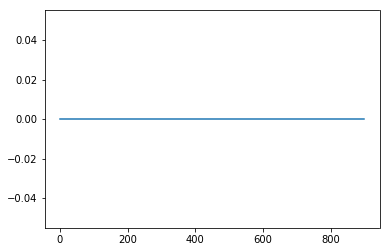

In [170]:
df_sin.iloc[10].plot()

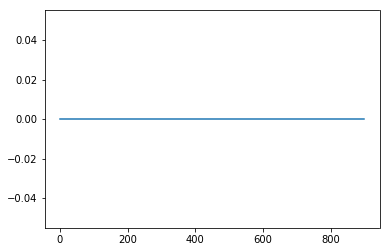

In [171]:
df_sin.iloc[100].plot()

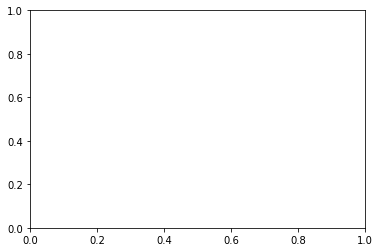

In [198]:
from scipy.stats import poisson
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

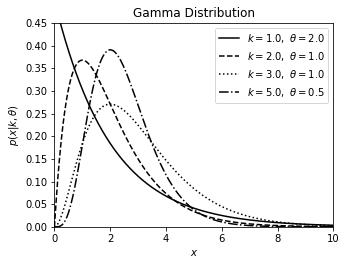

In [257]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from scipy.stats import gamma
from matplotlib import pyplot as plt

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
#from astroML.plotting import setup_text_plots
#setup_text_plots(fontsize=8, usetex=True)

#------------------------------------------------------------
# plot the distributions
k_values = [1, 2, 3, 5]
theta_values = [2, 1, 1, 0.5]
linestyles = ['-', '--', ':', '-.']
x = np.linspace(1E-6, 10, 1000)

#------------------------------------------------------------
# plot the distributions
fig, ax = plt.subplots(figsize=(5, 3.75))

for k, t, ls in zip(k_values, theta_values, linestyles):
    dist = gamma(k, 0, t)
    plt.plot(x, dist.pdf(x), ls=ls, c='black',
             label=r'$k=%.1f,\ \theta=%.1f$' % (k, t))

plt.xlim(0, 10)
plt.ylim(0, 0.45)

plt.xlabel('$x$')
plt.ylabel(r'$p(x|k,\theta)$')
plt.title('Gamma Distribution')

plt.legend(loc=0)
plt.show()

In [53]:
def features(acceleration_df
             , window_accel_samples
             , feature_function):
    
    length = len(acceleration_df)
    grouper = np.arange(length, dtype=int)//window_accel_samples
    
    return acceleration_df.groupby(grouper).apply(feature_function)

In [54]:
a_df = accelerometer(no_accel_samples=no_accel_samples
    , acceleration_model_function=acceleration_model_function)

f_df = features(acceleration_df=a_df
             ,window_accel_samples=window_accel_samples
             ,feature_function=sum)

In [52]:
def accelerometer(
    no_accel_samples
    , acceleration_model_function):
    
    return pd.DataFrame(
        {'acceleration':
             acceleration_model_function(
                 number_of_accelerometer_samples)})